# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
import sys

if sys.platform == 'darwin':
    env = UnityEnvironment(file_name="Tennis.app")
else:
    env = UnityEnvironment(file_name="Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

print(f'brain_name={brain_name}')

brain_name=TennisBrain


### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# replay_buffer = []

# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         #actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         #actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        
#         actions = np.array([[0, 1], [0, 1]])
        
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
        
#         replay_buffer.append((states, actions, next_states, rewards, dones))
        
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step

#         if np.any(dones):                                  # exit loop if episode finished
#             break
            
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## Networks

In [7]:
BUFFER_SIZE = 10_000
BATCH_SIZE = 250
GAMMA = 0.99
TAU = 1e-3
SKIP_STEPS = 2
ACTOR_LR = 1e-4
CRITIC_LR = 1e-3
SEED = 0

print('parameters defined')

parameters defined


In [8]:
import torch
import torch.nn as nn

class BaseNetwork(nn.Module):
    def __init__(self, seed=SEED,  device='cpu'):
        super().__init__()
        self.seed = torch.manual_seed(seed)
        self.device = device

    def _initialize_layer_uniform(self, layer, init_w=3e-3):
        #nn.init.kaming_normal_(layer.weight.data, a=0, mode='fan_in')
        layer.weight.data.uniform_(-init_w, init_w)
        layer.bias.data.fill_(0)
        
    def _initialize_layer_orthognal(self, layer, scale=1e-3):
        nn.init.orthogonal_(layer.weight.data)
        layer.weight.data.mul_(scale)
        layer.bias.data.fill_(0)
        
    def _initialize_layer_kaiming(self, layer):
        nn.init.kaiming_normal_(layer.weight.data, a=0, mode='fan_in')
        layer.bias.data.fill_(0)
        
    def fan_in_init(self, layer):
        fan_in = layer.weight.data.size()[0]
        return 1. / np.sqrt(fan_in)

    def initialize_weights(self):
        self._initialize_layer_orthognal(self.fc_input)
        self._initialize_layer_orthognal(self.hidden)
        self._initialize_layer_uniform(self.fc_output, init_w=3e-3)

        
class ActorDDPGNetwork(BaseNetwork):
    def __init__(self, state_size, action_size, layer1=200, layer2=150, device = 'cpu'):
        super().__init__(device=device)
        
        self.fc_input = nn.Linear(state_size, layer1).float().to(device)
        self.hidden = nn.Linear(layer1, layer2).float().to(device)
        self.fc_output = nn.Linear(layer2, action_size).float().to(device)
        self.initialize_weights()
        
    def initialize_weights(self):        
        self._initialize_layer_uniform(self.fc_input, self.fan_in_init(self.fc_input))
        self._initialize_layer_uniform(self.hidden, self.fan_in_init(self.hidden))
        self.fc_output.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        output = torch.relu(self.fc_input(state))
        output = torch.relu(self.hidden(output))
        output = self.fc_output(output)
        return torch.tanh(output)
    
    
class CriticDDPGNetwork(BaseNetwork):
    def __init__(self, agent_count, state_size, action_size, layer1=200, layer2=150, device = 'cpu'):
        super().__init__(device=device)
        
        self.fc_input = nn.Linear(agent_count * state_size + agent_count * action_size, layer1).float().to(device)
        self.hidden = nn.Linear(layer1, layer2).float().to(device)
        self.fc_output = nn.Linear(layer2, 1).float().to(device)
        self.initialize_weights()
    
    def forward(self, state, action):
        state_action = torch.cat((state, action), dim=1)
        output = torch.relu(self.fc_input(state_action))
        output = torch.relu(self.hidden(output))
        output = self.fc_output(output)
        return output

    def initialize_weights(self):        
        self._initialize_layer_uniform(self.fc_input, self.fan_in_init(self.fc_input))
        self._initialize_layer_uniform(self.hidden, self.fan_in_init(self.hidden))
        self.fc_output.weight.data.uniform_(-3e-3, 3e-3)


In [9]:
import os
from tensorboardX import SummaryWriter

log_path = os.getcwd()+"/log"
os.makedirs(log_path, exist_ok=True)

logger = SummaryWriter(log_dir=log_path)

## MADDPG Agent

### Algorithm Summary

1. Draw a sample of batch (size=250) from the replay buffer
2. This sample has two states, two next states, two set of actions and two set of rewards
3. Originally one of the two states was generated by the other agent but for testing we pass both the states to the local / target actor of this agent.
4. Set `next_actions = [target_actor(next_state[0]), target_actor(next_state[1])]`
5. Set `next_state_value` = target_ciritc(combined next states,  next actions)
6. Set `y` = reward (that this agent got) + gamma * next_state_value
7. Compute current value of state, actions by using the local critic.
8. Set `q_expected` = self.critic(combined states of both agents recorded in experience, combined actions that were taken by both agents)
9. Critic loss = mean squared error(q_expected, y)
10. For actor loss, the -ve of the gradient of the mean of the critic network is to be used as the loss function. This is easily achieved in PyTorch  by:

a. Create an Actor optimizer that has only the actor parameters    
b. Compute loss on critic network output      
c. Tell actor optimizer to back propogate. Since it only has the actor parameters, it will use the critic gradient calculated till the output of actor for back propogation.   


In [10]:
from noise import OUNoise

class DDPGAgent:
    def __init__(self, state_size, action_size, device='cpu'):
        self.device = device
        self.state_size = state_size
        self.action_size = action_size
        self.noise = OUNoise(action_size, seed=SEED)

        self.actor = ActorDDPGNetwork(state_size, action_size, device=device)
        self.actor_target = ActorDDPGNetwork(state_size, action_size, device=device)
        self.critic = CriticDDPGNetwork(2, state_size, action_size, device=device)
        self.critic_target = CriticDDPGNetwork(2, state_size, action_size, device=device)
    
        self.actor.initialize_weights()
        self.critic.initialize_weights()
        
        # complete update of weights from local to target
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.critic_target.load_state_dict(self.critic.state_dict())

        self.actor_optim = torch.optim.Adam(self.actor.parameters(), lr=CRITIC_LR)
        self.critic_optim = torch.optim.Adam(self.critic.parameters(), lr=ACTOR_LR)
        
    def act(self, state, add_noise=0.0):
        state_tensor = torch.from_numpy(state).float().to(self.device)

        self.actor.eval()
        with torch.no_grad():
            action = self.actor(state_tensor).cpu().data.numpy()
        self.actor.train()
        
        action += add_noise * self.noise.sample()
        return np.clip(action, -1, 1)
    
    def target_act(self, state_tensor):
        return self.actor_target(state_tensor)

    def reset_noise(self):
        self.noise.reset()
        
    def set_weights(self, from_actor):
        self.actor.load_state_dict(from_actor.state_dict())
        
    def learn(self, agent_index, experience, gamma, tau):
        states, actions, rewards, next_states, dones = experience
        
        batch_size = states.shape[0]
        assert batch_size == BATCH_SIZE, f'Batch size is not {BATCH_SIZE}'
        
        # Convert to tensors
        states = torch.from_numpy(states).float().to(self.device)
        next_states = torch.from_numpy(next_states).transpose(1, 0).float().to(self.device)
        actions = torch.from_numpy(actions).float().to(self.device)
        rewards = torch.from_numpy(rewards).transpose(1, 0).view(2, -1, 1).float().to(self.device)
        dones = torch.from_numpy(dones).transpose(1, 0).view(2, -1, 1).float().to(self.device)

        assert states.shape == (batch_size, 2, 24), f'states.shape={states.shape} is wrong, should be {batch_size},2,24'
        assert next_states.shape == (2,batch_size, 24), f'{next_states.shape} should have been 2,{batch_size},24'
        assert actions.shape == (batch_size, 2, 2), f'{actions.shape} should have been {batch_size},2,2'
        assert rewards.shape == (2, batch_size, 1), f'{rewards.shape} should have been 2,{batch_size},1'
        assert dones.shape == (2, batch_size, 1), f'{dones.shape} should have been 2,{batch_size},1'

        # critic
        next_action_list = [self.actor_target(next_states[i]) for i in range(2)]
        q_next_action = torch.cat(next_action_list, dim=1)
        next_states_crit = next_states.transpose(1, 0).view(batch_size, -1)

        assert next_states_crit.shape == (batch_size, 48), 'next_states_crit.shape is not correct'
        assert q_next_action.shape == (batch_size, 4), 'next_states_crit.shape is not correct'

        q_next_value = self.critic_target(next_states_crit, q_next_action)

        # assert q_next_value.shape == (128, 2), f'{q_next_value.shape} != (128,2)'
        agent_reward = rewards[agent_index]
        assert agent_reward.shape == (batch_size, 1), f'{agent_reward.shape} should have been {batch_size},1'
        
        y = agent_reward + gamma * q_next_value * (1 - dones[agent_index])
        
        # find the current state value
        actions_combined = actions.view(batch_size, -1)
        assert actions_combined.shape == (batch_size, 4), f'{actions_combined.shape} should have been {batch_size},4'
        
        states_combined = states.view(batch_size, -1)
        assert states_combined.shape == (batch_size, 48), f'combined states should be == ({batch_size}, 48)'

        q_expected = self.critic(states_combined, actions_combined)
        
        #huber_loss = torch.nn.SmoothL1Loss()
        critic_loss = F.mse_loss(q_expected, y)

        self.critic_optim.zero_grad()
        critic_loss.backward()
        #torch.nn.utils.clip_grad_norm_(self.critic.parameters(), 1)
        self.critic_optim.step()
        
        # actor
        actions_pred_list = [self.actor(s) for s in states.transpose(1,0)]
        actions_pred = torch.cat(actions_pred_list, dim=1)
        
        assert states_combined.shape == (batch_size, 48), f'combined states should be == ({batch_size}, 48)'
        assert actions_pred.shape == (batch_size, 4), f'{actions_pred.shape} combined actions should be == ({batch_size}, 4)'

        actor_loss = -self.critic(states_combined, actions_pred).mean()
        
        #torch.nn.utils.clip_grad_norm_(self.actor.parameters(), 0.5)
        
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()

        self._soft_update(self.critic_target, self.critic, tau)
        self._soft_update(self.actor_target, self.actor, tau)

        return actor_loss.cpu().detach().item(), critic_loss.cpu().detach().item()
    
    def _soft_update(self, target, local, tau):
        for target_param, local_param in zip(target.parameters(), local.parameters()):
            target_param.data.copy_(tau * local_param + (1 - tau) * target_param)
            # target_param.data.mul_(1 - self.tau)
            # target_param.data.add_(self.tau * local_param)


    def load(self, filename):
        data = torch.load(filename)
        self.agents[0].actor.load_state_dict(data['actor0'])
        self.agents[1].actor.load_state_dict(data['actor1'])
        self.agents[0].critic.load_state_dict(data['critic0'])
        self.agents[1].critic.load_state_dict(data['critic1'])

    def save(self, filename):
        data = {
            'actor0': self.agents[0].actor.state_dict(), 
            'actor1': self.agents[1].actor.state_dict(), 
            'critic0': self.agents[0].critic.state_dict(), 
            'critic1': self.agents[1].critic.state_dict()}
        torch.save(data, filename)

        


## MADDPG 

This class creates two agents and interacts with the environment trainer to train them

In [11]:
from replay import ReplayBuffer, Experience
#from noise import OUNoise
import torch.nn.functional as F


class MADDPG():
    def __init__(self, state_size, action_size, device='cpu', logger=None):
        self.tau = TAU
        self.gamma = GAMMA
        self.batch_size = BATCH_SIZE
        self.skip_steps = SKIP_STEPS
        self.learning_steps = 0
        self.iter = 0
        self.device = device

        self.agents = [DDPGAgent(state_size, action_size, device=device),
                       DDPGAgent(state_size, action_size, device=device)]
        
        self.replay_buffer = ReplayBuffer(maxlen=BUFFER_SIZE, batch_size=self.batch_size)
        self.logger = logger

    def add_to_buffer(self, states, actions, rewards, next_states, dones):
        actions = np.array(actions)
        rewards = np.array(rewards)
        dones = np.array(dones).astype(int)
        
        experience = Experience(states, actions, rewards, next_states, dones)
        self.replay_buffer.add(experience)

    def reset_noise(self):
        self.agents[0].reset_noise()
        self.agents[1].reset_noise()

    def act(self, states):
        actions = []
        for i in range(2):
            actions.append(self.agents[i].act(states[i], 1.0))
        return actions

    def target_act(self, next_states):
        actions = []
        for i in range(2):
            actions.append(self.agents[i].actor_target(next_states[:,i,:]))
        return torch.cat(actions, dim=1).to(self.device)
    
    def local_act(self, states):
        actions = []
        for i in range(2):
            actions.append(self.agents[i].actor(states[:,i,:]))
        return torch.cat(actions, dim=1)


    def step(self, states, actions, rewards, next_states, dones):
        self.iter += 1
        
        self.add_to_buffer(states, actions, rewards, next_states, dones)
        if not self.replay_buffer.is_full:
            return False
        
        if self.iter % self.skip_steps == 0:
            self.learning_steps += 1
            for i in range(2):
                experience = self.replay_buffer.sample_batch()[0]
                actor_loss, critic_loss = self.agents[i].learn(i, experience, self.gamma, self.tau)
                
            if self.logger:
                self.logger.add_scalars('agent/losses',{'critic loss': critic_loss, 'actor_loss': actor_loss}, self.iter)

        return False
    
    def load(self, filename):
        data = torch.load(filename)
        self.agents[0].actor.load_state_dict(data['actor0'])
        self.agents[1].actor.load_state_dict(data['actor1'])
        self.agents[0].critic.load_state_dict(data['critic0'])
        self.agents[1].critic.load_state_dict(data['critic1'])

    def save(self, filename):
        data = {
            'actor0': self.agents[0].actor.state_dict(), 
            'actor1': self.agents[1].actor.state_dict(), 
            'critic0': self.agents[0].critic.state_dict(), 
            'critic1': self.agents[1].critic.state_dict()}
        torch.save(data, filename)


## Training Loop

The training loop uses random action initially to fill the replay buffer. Then it starts training. The inital random actions are also saved to a file random.dat, in case the training has to be re-run this can be reused to speed up things.

In [12]:
import math
import pickle
import os.path
from collections import deque

initial_file = 'random.dat'

def train_agent(agent, episodes=6000):
    scores_100 = deque(maxlen = 100)
    scores = []
    print_every = 200
    ep_no = 0
    total_steps = 0

    if not agent.replay_buffer.is_full:
        while not agent.replay_buffer.is_full:
            env_info = env.reset(train_mode=True)[brain_name]
            states = env_info.vector_observations

            done = False
            while not done:
                actions = np.random.randn(num_agents, action_size)
                actions = np.clip(actions, -0.65, 0.65)

                info = env.step(actions)[brain_name]

                next_states = info.vector_observations
                rewards = info.rewards
                dones = info.local_done

                agent.add_to_buffer(states, actions, rewards, next_states, dones)

                done = np.any(dones)
                states = next_states
                total_steps += 1

            print(f'Random Episode End: {ep_no}, total steps: {total_steps}', end ='\r')
            ep_no += 1

        agent.replay_buffer.dump(initial_file)

    for ep_no in range(1, episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        ep_score = np.zeros(num_agents)
        agent.reset_noise()

        t = 0
        done = False
        
        while not done:
            actions = agent.act(states)
            info = env.step(actions)[brain_name]

            next_states = info.vector_observations
            rewards = info.rewards
            dones = info.local_done
            
            agent.step(states, actions, rewards, next_states, dones)

            states = next_states
            ep_score += rewards

            t += 1
            total_steps += 1
            
            done = np.any(dones) 
        
        max_score = np.max(ep_score)
        scores_100.append(max_score)
        scores.append(max_score)
        mean_100 = np.mean(scores_100)
        
        logger.add_scalars(f'scores', {'agent0': ep_score[0], 'agent1': ep_score[1]}, ep_no)
        logger.add_scalar(f'max_scores', max_score, ep_no)
        logger.add_scalar(f'mean_100', mean_100, ep_no)
        
        print(f'ep:{ep_no}, Last100 mu:{mean_100:.5f}    ', end = '\r')
        
        if ep_no % print_every == 0:
            print(f'ep:{ep_no}, Last100 mu:{mean_100:.5f}, total moves: {total_steps}, learning moves: {agent.learning_steps}')

        if len(scores_100) >= 100 and mean_100 >= 0.5:
            agent.save('final_score.pth')
            print(f'\r\nScore acheived!!! Last 100 score: {mean_100}')
            break

    return scores, scores_100

device='cuda' if torch.cuda.is_available() else 'cpu'

agent = MADDPG(state_size, action_size, device=device, logger=logger)
if os.path.isfile(initial_file):
    print(f'Initial random action file found. Loading replay buffer from it {initial_file}')
    agent.replay_buffer.load(initial_file)

scores, scores_100 = train_agent(agent, episodes=15_000)
logger.close()

print('done')

ep:200, Last100 mu:0.00000, total moves: 12874, learning moves: 1435
ep:400, Last100 mu:0.00000, total moves: 15714, learning moves: 2855
ep:600, Last100 mu:0.00000, total moves: 18554, learning moves: 4275
ep:800, Last100 mu:0.00360, total moves: 21460, learning moves: 5728
ep:1000, Last100 mu:0.01400, total moves: 24797, learning moves: 7397
ep:1200, Last100 mu:0.00500, total moves: 28022, learning moves: 9009
ep:1400, Last100 mu:0.00190, total moves: 30970, learning moves: 10483
ep:1600, Last100 mu:0.02400, total moves: 34615, learning moves: 12306
ep:1800, Last100 mu:0.01600, total moves: 38333, learning moves: 14165
ep:2000, Last100 mu:0.04920, total moves: 43273, learning moves: 16635
ep:2200, Last100 mu:0.04310, total moves: 48652, learning moves: 19324
ep:2400, Last100 mu:0.07520, total moves: 54569, learning moves: 22283
ep:2600, Last100 mu:0.06290, total moves: 61654, learning moves: 25825
ep:2800, Last100 mu:0.10460, total moves: 68585, learning moves: 29291
ep:3000, Last100

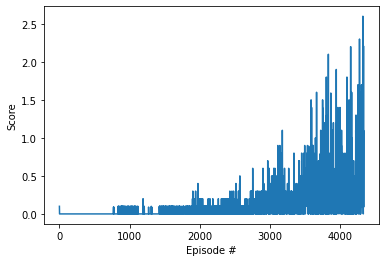

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

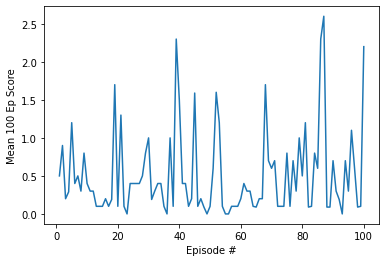

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_100)+1), scores_100)
plt.ylabel('Mean 100 Ep Score')
plt.xlabel('Episode #')
plt.show()
